# **Churn Analytic**

# **Pre-Processing**

## **Business Understanding**

Problem 
> Pelanggan tidak kembali lagi

Goals
> Dapat mengetahui karakteristik yang berpotensi Churn

Objective
> Membuat pelabelan customer berdasarkan pola berbelanja

Business metric 
> Memprediksi customer churn


## **Analytical Aproach** 

Descriptive analytical: 
> Melihat kecenderungan dan karakter customer yang berpotensi churn 

Diagnostic analytical:
> Mencari Penyebab customer churn

Predictive analytical:
> Membuat model prediksi cistomer churn

Prescriptive analytical:
> Memprediksi customer churn

## **Data Requiremnets and Collection**

Data Internal 
> E-commerce dataset

## **Data Prepation**

### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

saat ini kita akan import pandas untuk pengolahan data, numpy untuk operasi matematika serta matplotlib dan seaborn untuk visualisasi grafik

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


pada tahap ini mengimport data dari google drive

### **Load Dataset**

In [ ]:
path = '/content/gdrive/MyDrive/Final Project DBI/E Commerce Dataset.xlsx'
df = pd.read_excel(path)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


path diambil dari googlw drive folder Final Project DBI dengan nama file E-commerce Dataset.xlsx, kemudian pandas membaca file xcel pada path selanjutnya menampilkan kepala tabel.

### **Data Quality Checking**

In [ ]:
df.shape

(5630, 20)

df.shape digunakan untuk menghitung baris dan kolom pada tabel. dapat kita lihat terdapat 5630 baris dengan 20 kolom

In [ ]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

df.dtype digunakan untuk mengecek tipe data variabel. dari hasil pengecekan diatas didapat 7 tipe data integer, 8 tipe data float dan 5 tipe data object.
> tipe data integer
- CustomerID
- Churn 
- CityTier
- NumberOfDeviceRegistered 
- SatisfactionScore 
- NumberOfAddress
- Complain

>tipe data float
- Tenure 
- WarehouseToHome
- HourSpendOnApp
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder
- CashbackAmount

>tipe data object
- PreferredLoginDevice 
- PreferredPaymentMode
- Gender
- PreferedOrderCat
- MaritalStatus

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


df. describe digunakan untuk Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom.

### **Data Cleaning**

In [ ]:
# Data Missing Check
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

df.isnull().sum() digunakan untuk menghitung jumlah null pada setiap variabel. dapat kita lihat bahwa terdapat null pada 
- Tenure                         264
- WarehouseToHome                251
- HourSpendOnApp                 255
- OrderAmountHikeFromlastYear    265
- CouponUsed                     256
- OrderCount                     258
- DaySinceLastOrder              307



In [ ]:
# Data Duplicated
df.duplicated().sum()

0

df.duplicated().sum() untuk menghitung jumlah duplikat, ternyata setelah dicek tidak terdapat duplikat

In [ ]:
for col in df.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msg)

column: CustomerID	 percent of NaN value: 0.00%
column:      Churn	 percent of NaN value: 0.00%
column:     Tenure	 percent of NaN value: 4.69%
column: PreferredLoginDevice	 percent of NaN value: 0.00%
column:   CityTier	 percent of NaN value: 0.00%
column: WarehouseToHome	 percent of NaN value: 4.46%
column: PreferredPaymentMode	 percent of NaN value: 0.00%
column:     Gender	 percent of NaN value: 0.00%
column: HourSpendOnApp	 percent of NaN value: 4.53%
column: NumberOfDeviceRegistered	 percent of NaN value: 0.00%
column: PreferedOrderCat	 percent of NaN value: 0.00%
column: SatisfactionScore	 percent of NaN value: 0.00%
column: MaritalStatus	 percent of NaN value: 0.00%
column: NumberOfAddress	 percent of NaN value: 0.00%
column:   Complain	 percent of NaN value: 0.00%
column: OrderAmountHikeFromlastYear	 percent of NaN value: 4.71%
column: CouponUsed	 percent of NaN value: 4.55%
column: OrderCount	 percent of NaN value: 4.58%
column: DaySinceLastOrder	 percent of NaN value: 5.45%


pada baris ini kita akan menghitung null dalam bentuk persentasi.
setelah kita cek didapat bahwa:
- Tenure	 percent of NaN value: 4.69%
- WarehouseToHome	 percent of NaN value: 4.46%
- HourSpendOnApp	 percent of NaN value: 4.53%
- OrderAmountHikeFromlastYear	 percent of NaN value: 4.71%
- CouponUsed	 percent of NaN value: 4.55%
- OrderCount	 percent of NaN value: 4.58%
- DaySinceLastOrder	 percent of NaN value: 5.45%


In [ ]:
num = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
cat = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

kita akan membagi kolom numerical dan categorical. 
- pada kolom numberical terdapat variabel : CustomerID, Churn, Tenure, CityTier, WarehouseToHome, HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, dan CashbackAmount.
- pada kolom categorical terdapat variabel : PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, dan MaritalStatus 

In [ ]:
for column in num:
    df.loc[df[column].isnull(), column] = df[column].median()

pada baris code sebelumnya jumlah null berada dibawah 10%. sesuai teori null dibawah 10% dapat kita dropna. akan tetapi setelah kita dropna hasil jumlah baris berkurang hampir setengahnya maka dari itu variabel yang null akan kami isi dengan nilai median. 

Kemudian dilakukan pengecekan ulang data kosong.

In [ ]:
# Data Missing Check
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Terlihat data kosong sudah terisi.

### **Data Exploration**

In [ ]:
plt.figure(figsize=(20, 9))
for i in range(0, len(num)):
    plt.subplot(5, len(num)/5, i+1)
    sns.boxplot(df[num[i]], color='blue', orient='v')
    plt.tight_layout()

NameError: ignored

variabel yang memiliki outlier yaitu: Tenure, WarehouseToHome, HourSpeedOnApp, NumberOfDeviceRegistered, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder dan CashbackAmount.

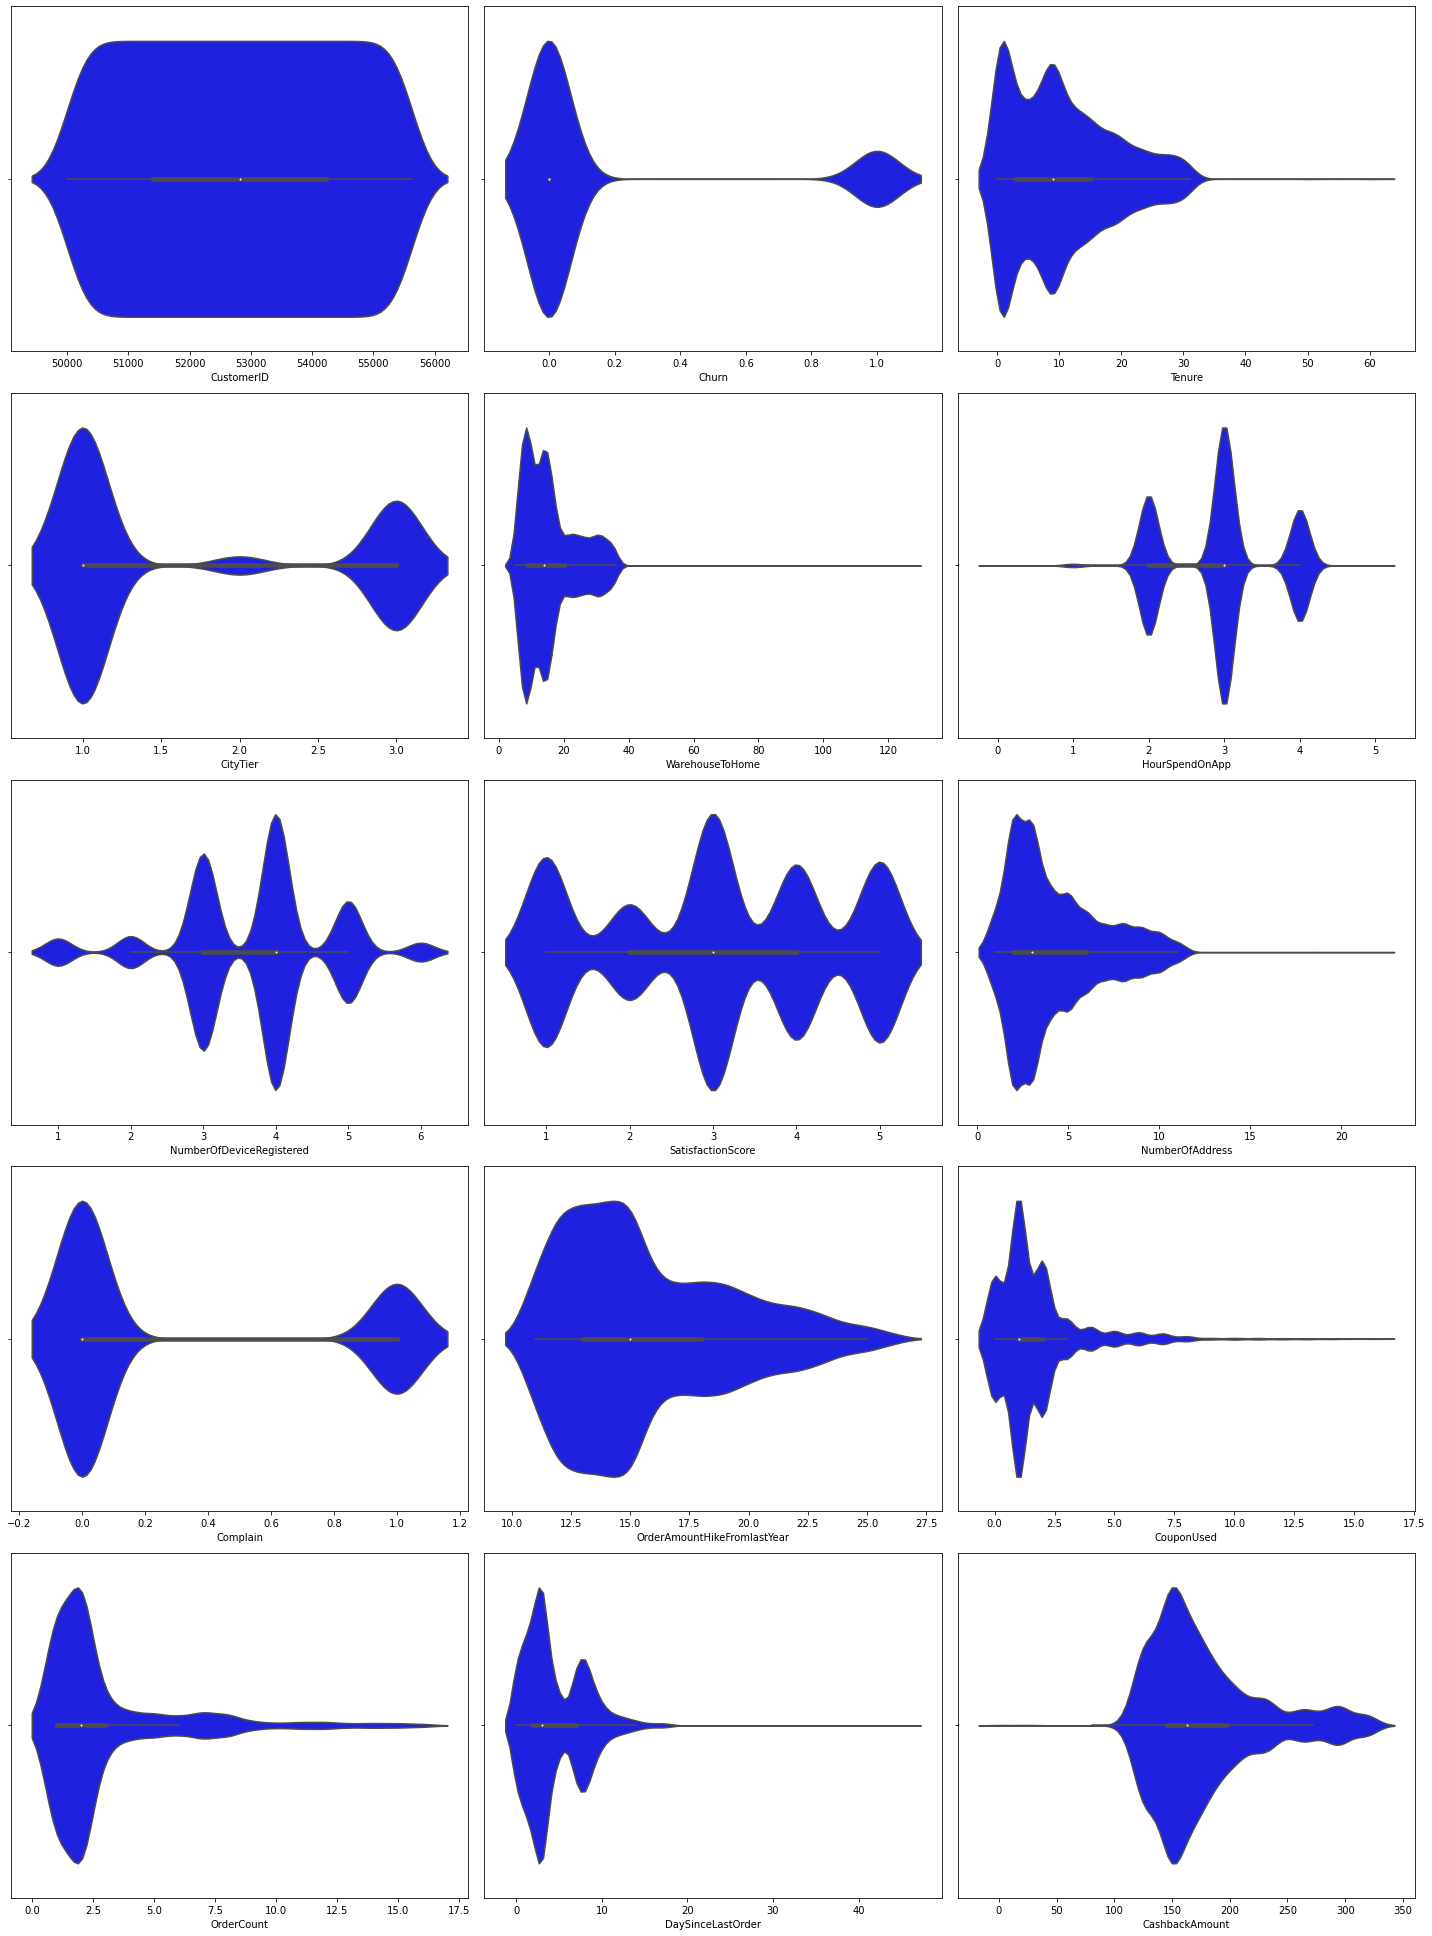

In [ ]:
plt.figure(figsize=(20, 27))
for i in range(0, len(num)):
  plt.subplot(5, len(num)/5, i+1)
  sns.violinplot(df[num[i]], color='blue', orient='v')
  plt.tight_layout()

In [ ]:
print('Skew: {}'.format(df[num].skew()))
#dilakukan untuk melihat nilai skew (kecenderungan)
#jika nilainya kurang dari mutlak 2,5% biarkan saja

Skew: CustomerID                     0.000000
Churn                          1.772843
Tenure                         0.773278
CityTier                       0.735326
WarehouseToHome                1.678346
HourSpendOnApp                -0.040982
NumberOfDeviceRegistered      -0.396969
SatisfactionScore             -0.142626
NumberOfAddress                1.088639
Complain                       0.953347
OrderAmountHikeFromlastYear    0.835439
CouponUsed                     2.630035
OrderCount                     2.276640
DaySinceLastOrder              1.273530
CashbackAmount                 1.149846
dtype: float64


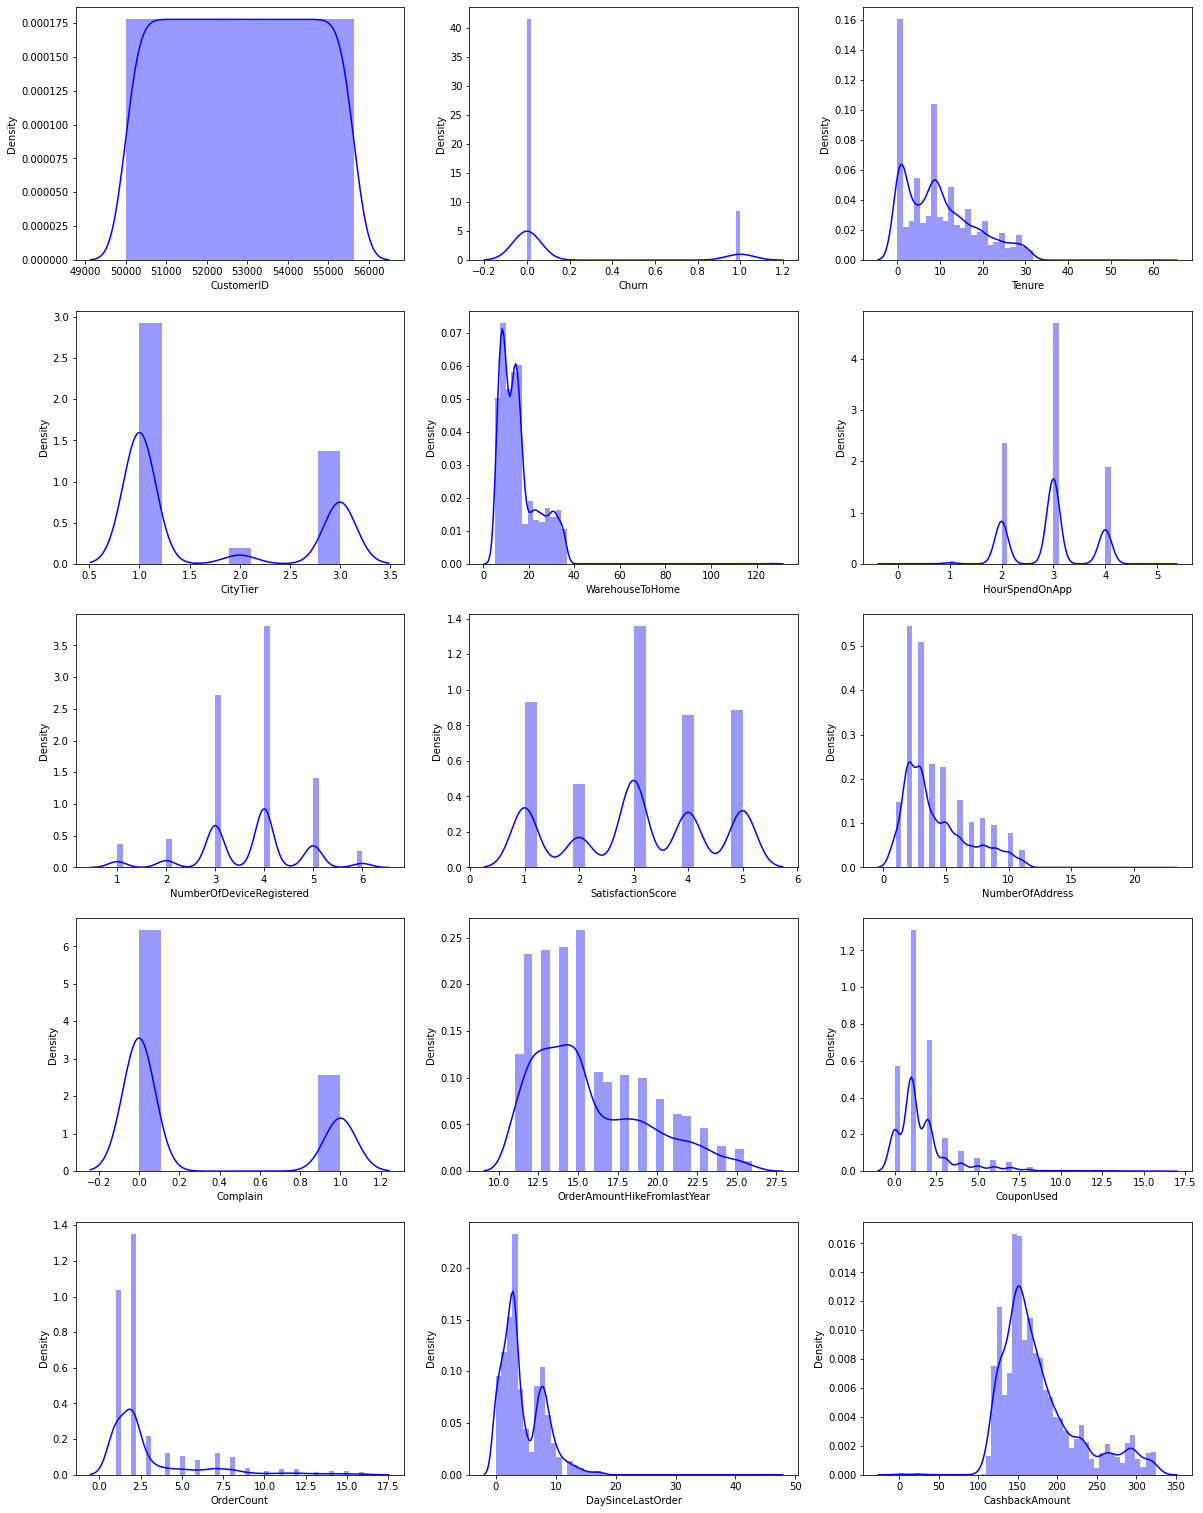

In [ ]:
plt.figure(figsize=(20, 27))
for i in range(0, len(num)):
  plt.subplot(5, len(num)/5, i+1)
  sns.distplot(df[num[i]], color='blue')

disini kita dapat melihat distribusi plot pada kolom numerical

# **Exploratory Data Analysis**

In [ ]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

kita mengecek jumlah isi variabel churn. terdapat 
- nilai 0 sebanyak 4682
- nilai 1 sebanyak 948

Text(0.5, 1.0, 'Persentase Churn (%)')

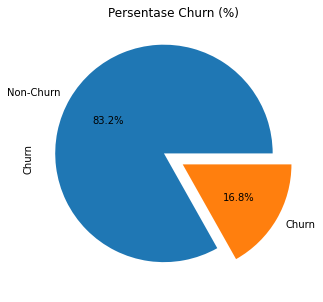

In [ ]:
labels = 'Non-Churn', 'Churn'
df['Churn'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=False,figsize=(5,5));
plt.title("Persentase Churn (%)")

Jika kita lihat secara presentase dapat dilihat bahwa terdapat customer churn sebesar 16,8%.

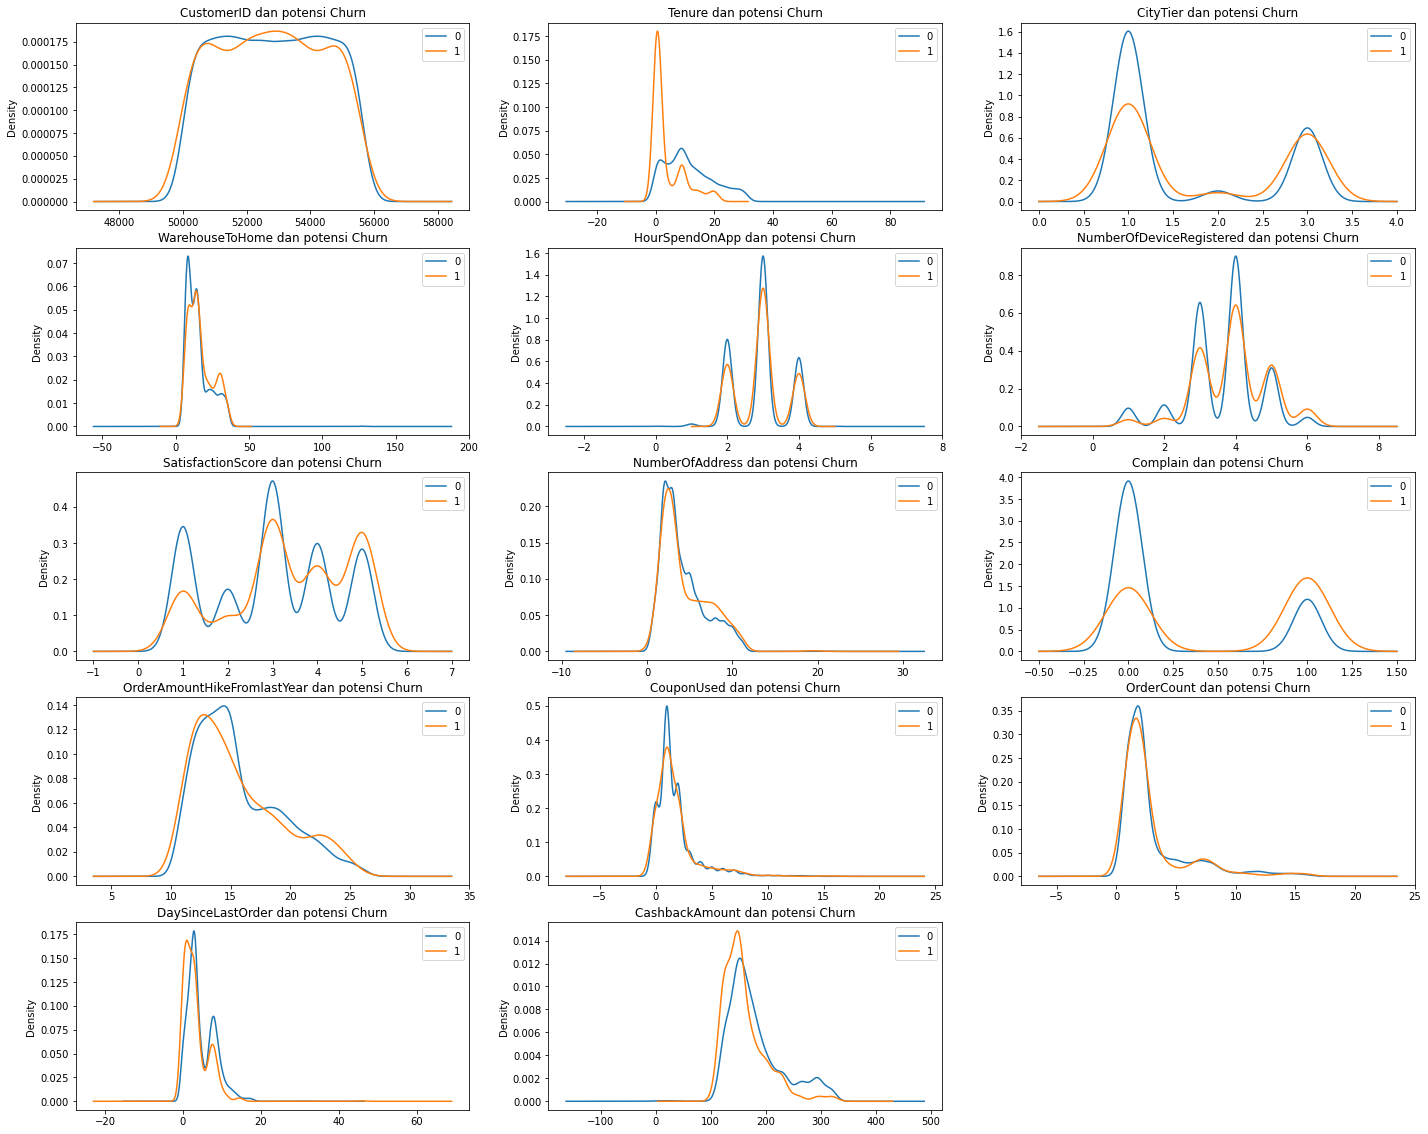

In [ ]:
datacat = ['CustomerID', 'Tenure',	'CityTier',	'WarehouseToHome',	'HourSpendOnApp',	'NumberOfDeviceRegistered',	'SatisfactionScore',	'NumberOfAddress',	
       'Complain',	'OrderAmountHikeFromlastYear',	'CouponUsed', 'OrderCount',	'DaySinceLastOrder', 'CashbackAmount']
pos = 1
plt.figure(figsize=(24, 20))
for column in datacat:
    plt.subplot(5, 3, pos)
    df.groupby('Churn')[column].plot.density(title= column + ' dan potensi Churn')
    plt.legend()
    pos = pos + 1

plt.show()

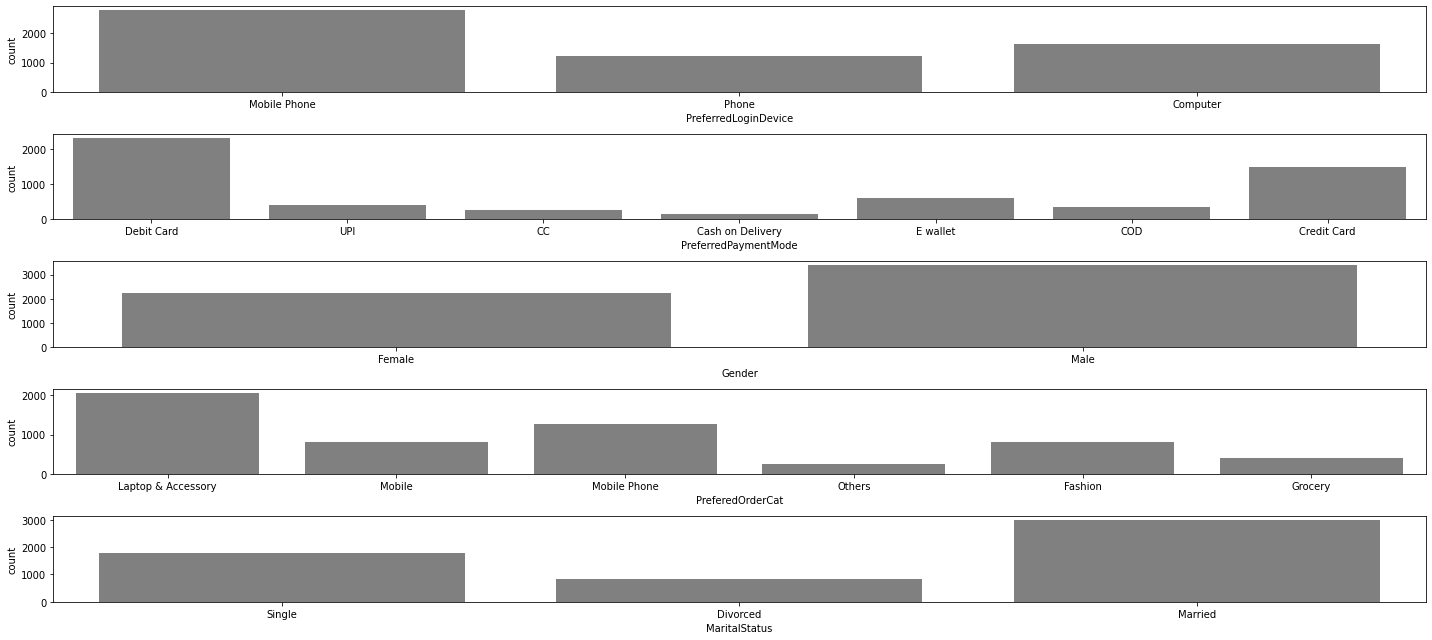

In [ ]:
plt.figure(figsize=(20, 9))
for i in range(0, len(cat_columns)):
  plt.subplot(5, 1, i+1)
  sns.countplot(df[cat_columns[i]], color="grey", orient="v")
  plt.tight_layout()

Dari countplot diatas dapat kita ketahui bahwa:
> PreferredLoginDevice
>> Mobile Phone 2765, Computer 1634, dan Phone 1231

> PreferredPaymentMode
>> Debit Card 2314, Credit Card  1501, E wallet 614, UPI 414, COD 365,CC 273, dan Cash on Delivery 149. 

> Gender 
>> Male 3384 dan Female 2246

> PreferedOrderCat
>> Laptop & Accessory 2050, Mobile Phone 1271, Fashion 826, Mobile 809, Grocery, 410 dan Others 264

> MaritalStatus
>> Married 2986, Single 1796 dan Divorced 848

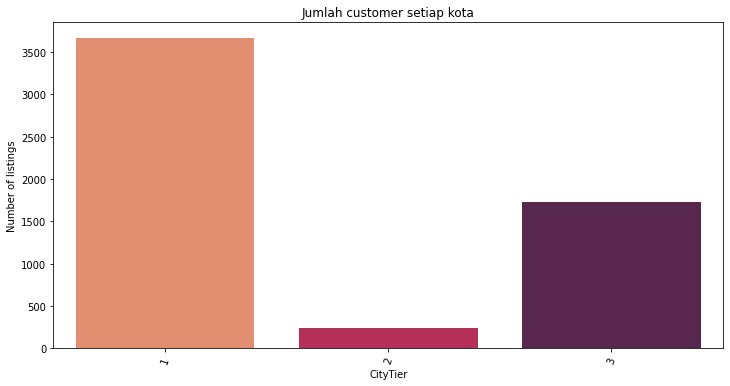

In [ ]:
kota= df.groupby(['CityTier'])['CustomerID'].count().sort_values(ascending=False).reset_index().head(10)
kota.rename(columns={'CustomerID':'Number of listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(kota['CityTier'],kota['Number of listings'],palette='rocket_r');
plt.title('Jumlah customer setiap kota');
plt.xticks(rotation=70);

Dari Barplot diatas dapat kita ketahui bahwa terdapat customer sebanyak 3666 di kota 1, 1722 di kota 3 dan 242 di kota 2. 

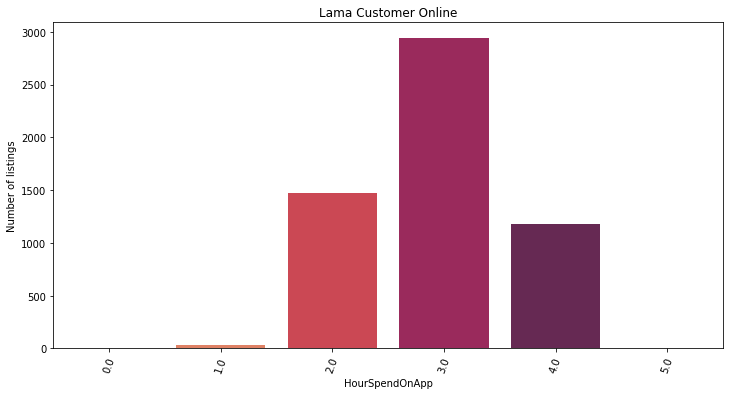

In [ ]:
online= df.groupby(['HourSpendOnApp'])['CustomerID'].count().sort_values(ascending=False).reset_index().head(10)
online.rename(columns={'CustomerID':'Number of listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(online['HourSpendOnApp'],online['Number of listings'],palette='rocket_r');
plt.title('Lama Customer Online');
plt.xticks(rotation=70);

Ternyata banyak customer online selama 3 jam.

In [ ]:
df['HourSpendOnApp'].value_counts()

3.0    2942
2.0    1471
4.0    1176
1.0      35
5.0       3
0.0       3
Name: HourSpendOnApp, dtype: int64

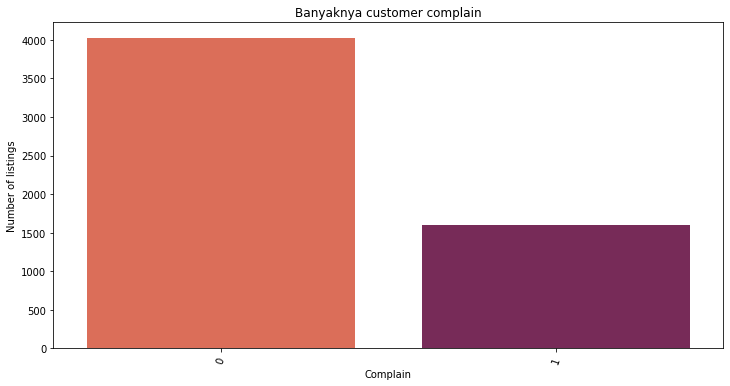

In [ ]:
Komplain= df.groupby(['Complain'])['CustomerID'].count().sort_values(ascending=False).reset_index().head(10)
Komplain.rename(columns={'CustomerID':'Number of listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(Komplain['Complain'],Komplain['Number of listings'],palette='rocket_r');
plt.title('Banyaknya customer complain');
plt.xticks(rotation=70);

Text(0.5, 1.0, 'Persentase Complain (%)')

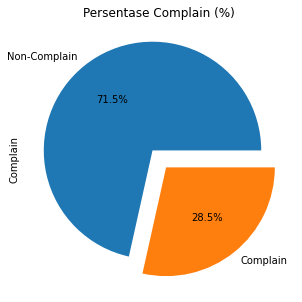

In [ ]:
labels = 'Non-Complain', 'Complain'
df['Complain'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=False,figsize=(5,5));
plt.title("Persentase Complain (%)")

customer complain sebanyak 28,5%.

### **Korelasi antar variable (numerikal)**

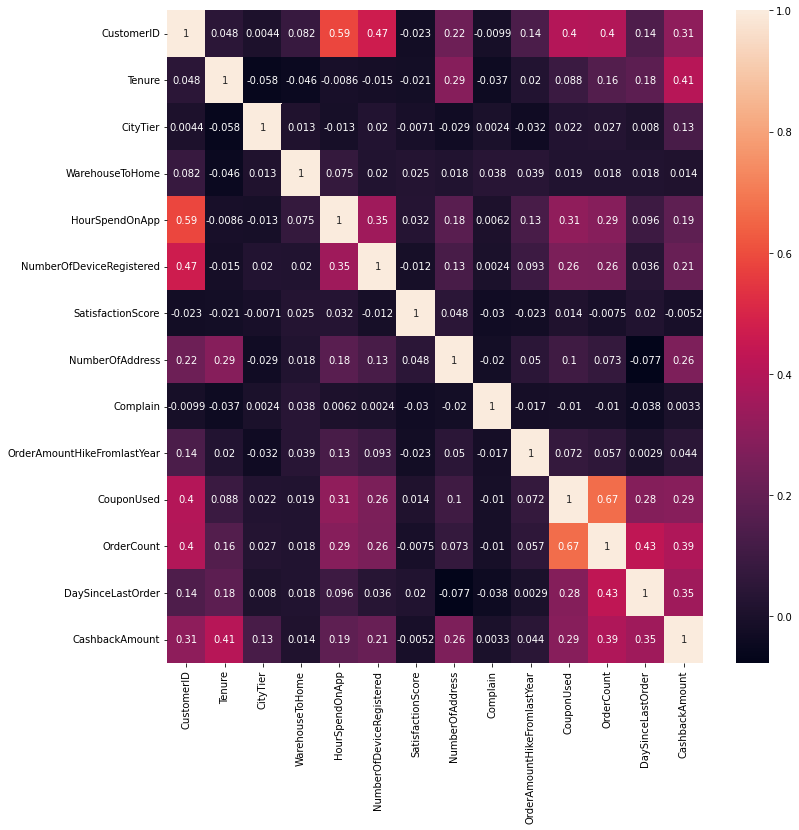

In [ ]:
#pearson (tidak sensitif outlier)
#spearman (sensitif outlier)

correlation = df[datacat].corr(method='spearman') 

plt.figure(figsize=(12, 12))
sns.heatmap(correlation, annot=True) #annot(annotasi) agar tahu valuenya berapa
plt.show()

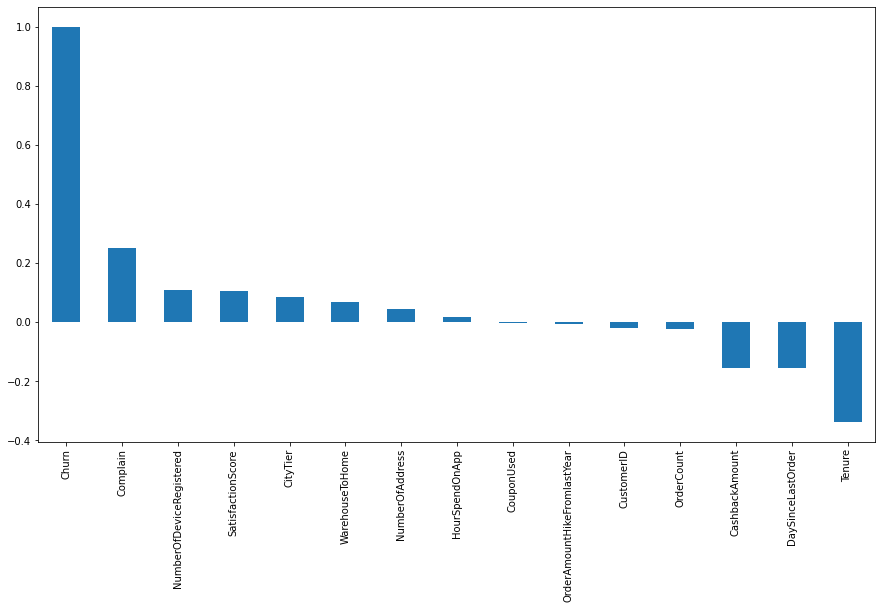

In [ ]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar') 

Disini dapat dilihat bar chart korelasi Variabel-variabel dengan Churn.

In [ ]:
df.corr()['Churn'].sort_values(ascending = False)

Churn                          1.000000
Complain                       0.250188
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.069544
NumberOfAddress                0.043931
HourSpendOnApp                 0.018816
CouponUsed                    -0.001430
OrderAmountHikeFromlastYear   -0.007075
CustomerID                    -0.019083
OrderCount                    -0.024038
CashbackAmount                -0.154118
DaySinceLastOrder             -0.155871
Tenure                        -0.337831
Name: Churn, dtype: float64

Disini dapat dilihat tabel korelasi Variabel-variabel dengan Churn, yang diurutkan dari yang paling tinggi ke yang paling rendah.

### **Korelasi category dengan category (Chi-square)**

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
table = df[['Churn', 'Gender']].pivot_table(index='Churn', columns='Gender', aggfunc=lambda x: len(x))

In [ ]:
 chi2_contingency(table) #ambil value ketiga (probabilitas value)

(4.662908495367532,
 0.030820940334890086,
 1,
 array([[1867.81030195, 2814.18969805],
        [ 378.18969805,  569.81030195]]))

In [ ]:
_, p_value, _, _, = chi2_contingency(table)

### **Fungsi Untuk Korelasi Antar Variable (Categorical)**

In [ ]:
# H0 = Variabel Churn dan Gender tidak berkorelasi (p-value >= maka error)
# H1 = Variabel Churn dan Gender berkorelasi (p-value < maka error) alpha
error = 0.05
print('error: ', error)
print('p-value: ', p_value)
if p_value < error:
    print('Variabel Churn dan Gender berkorelasi')
else:
    print('Variabel Churn dan Gender tidak berkorelasi')

error:  0.05
p-value:  0.030820940334890086
Variabel Churn dan Gender berkorelasi


### **Looping Fungsi**

In [ ]:
cat_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'] #valuenya hanya yang categorical
error = 0.05

for column in cat_cols:
    table = df[[column, 'Churn']].pivot_table(index='Churn',
                                                   columns=column,
                                                   aggfunc=lambda x: len(x))
    _, p_value, _, _ = chi2_contingency(table)

    print('Variable:', column)
    print('p-value: ', p_value)
    if p_value < error:
        print('Variabel ' + column + ' dn Churn berkorelasi')
    else:
        print('Variabel ' + column + ' dan Churn tidak berkorelasi')
    print('')

Variable: PreferredLoginDevice
p-value:  1.0756922373255213e-16
Variabel PreferredLoginDevice dn Churn berkorelasi

Variable: PreferredPaymentMode
p-value:  9.708708511076305e-15
Variabel PreferredPaymentMode dn Churn berkorelasi

Variable: Gender
p-value:  0.030820940334890086
Variabel Gender dn Churn berkorelasi

Variable: PreferedOrderCat
p-value:  2.7708325346337454e-60
Variabel PreferedOrderCat dn Churn berkorelasi

Variable: MaritalStatus
p-value:  1.073011277910542e-41
Variabel MaritalStatus dn Churn berkorelasi



# **Modelling**

## **Feature Engineering**

### **Train Test Split**

Dataset df akan dipisah menjadi data Training dan data Testing, dengan persentase data testing sebesar 20%.

Pada variabel X, akan dihapus variabel-variabel yang kurang berpengaruh pada model yaitu 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat','MaritalStatus', 'CustomerID', 'Churn'.

Variabel Y (target) yang ingin diuji adalah variabel 'Churn'.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat','MaritalStatus','CustomerID' ,'Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Dilakukan pengecekan jumlah data training dan data testing.

In [ ]:
X_train.shape, X_test.shape

((4504, 13), (1126, 13))

In [ ]:
y_train.shape, y_test.shape

((4504,), (1126,))

Data training dan data testing sudah terbagi dengan benar.

### **Scalling Data**

Dilakukan scalling data agar menghilangkan skewness pada data, dan menjadikan distribusi data menjadi distribusi normal, agar mempermudah proses pemodelan. Digunakan RobustScaler dikarenakan data memiliki outlier.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
ss = StandardScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

X_train dan X_test telah ditransformasi menggunakan Robust Scaler.

In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0.500000,0.0,0.909091,-1.0,-1.0,1.0,1.00,1.0,0.4,-1.0,-0.5,-0.2,-0.176459
1,0.750000,0.0,-0.454545,1.0,-2.0,-1.0,0.00,1.0,1.0,6.0,2.5,1.0,0.828496
2,-0.666667,0.0,-0.090909,0.0,1.0,0.0,0.00,0.0,-0.2,2.0,0.5,0.0,-0.251492
3,0.750000,1.0,0.272727,-1.0,-1.0,-1.0,0.25,0.0,-0.4,0.0,-0.5,-0.4,2.299019
4,-0.333333,1.0,0.000000,1.0,0.0,-1.0,0.75,0.0,-0.4,0.0,0.0,1.0,0.761351


Terlihat data train sudah berhasil dilakukan Scalling.

### **Imbalanced Dataset**


In [ ]:
# Label proportion
pd.Series(y_train).value_counts()

0    3743
1     761
Name: Churn, dtype: int64

Data target tidak seimbang. Dilakukan dua metode yaitu (1) Undersampling dan (2) Oversampling.

### **1. Undersampling**

In [ ]:
!pip install imblearn --user

Penginstallan modul Imblearn.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

Syntax untuk Undersample data train lalu memasukkannya ke variabel X_under dan y_under.

In [ ]:
pd.Series(y_under).value_counts()

1    761
0    761
Name: Churn, dtype: int64

Data telah berhasil dilakukan Undersampling.

### **2. SMOTE Oversampling**

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)

Syntax untuk Oversample data train lalu memasukkannya ke variabel X_over dan y_over.

In [ ]:
pd.Series(y_over).value_counts()

1    3743
0    3743
Name: Churn, dtype: int64

Data telah berhasil dilakukan Oversampling.

## **3. Model Scoring Function**

Akan dibuat function 'multiclass_eval' untuk menghitung skor dari model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

Import modul-modul yang digunakan untuk Scoring Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

def multiclass_eval (y_true, y_pred, name=''):
    """
    Multiclass evaluation function. This function only focus on Accuracy,
    Recall and Precision of each class.
    
    Parameters
    ----------
    
    y_true:    array
        target of prediction
    
    y_pred:    array
        predicted target

    name:  String
        Name of Model
    
    Printed Information
    -------------------
    1. Confusion Matrix
    2. Accuracy
    3. Recall of each class
    4. Precision of each class
    """
    cm = confusion_matrix(y_true, y_pred)
    # Number of Classes
    classes = cm.shape[0]

    # Define Placeholder
    true_vals = []
    actual_side = []
    pred_side = []

    # Loop to get the result
    for i in range(0, classes):
        true_vals.append(cm[i][i])
        actual_side.append(sum(cm[i]))
        pred_side.append(sum(cm.T[i]))

    # Accuracy
    accuracy = sum(true_vals) / sum(actual_side)
    print(name, 'Model Performance')
    print(cm, '\n')
    print('Accuracy          :', round(accuracy * 100, 1), '%')

    # Loop to get Recall and Precision
    for i in range(0, classes):
        print('\nClass', i, 'Overview:')
        recall    = true_vals[i] / actual_side[i]
        precision = true_vals[i] / pred_side[i]
        f1_score = (2 * precision * recall) / (precision + recall)
        print('Recall Class', i,'   :', round(recall * 100, 1), '%')
        print('Precision Class', i,':', round(precision * 100, 1), '%')
        print('F1 Score  Class', i,':', round(f1_score * 100, 1), '%')

Fungsi 'modelclass_eval' telah berhasil dibuat.

## **4. Training Model**

In [ ]:
# Training model dilakukan menggunakan Regresi Logistik, karena target merupakan variabel yang isinya hanya dua pilihan (Churn Yes or No)
from sklearn.linear_model import LogisticRegression

# Inisiasi Model
logreg_under = LogisticRegression(solver='liblinear', random_state=0)
logreg_over = LogisticRegression(solver='liblinear', random_state=0)
# Fitting model untuk dua data, yaitu Undersampling dan Oversampling
logreg_under.fit(X_under, y_under)
logreg_over.fit(X_over, y_over)

LogisticRegression(random_state=0, solver='liblinear')

Dibuat dua variabel logreg, yaitu logreg_under dan logreg_over. Dua variabel ini untuk membandingkan kedua model Logistic Regression dengan data Undersampling dan data Oversampling.

**a. Training model untuk Undersampling**

In [ ]:
y_pred_test_under = logreg_under.predict(X_test)
y_pred_train_under = logreg_under.predict(X_under)

Dibuat variabel testing dan training untuk data yang telah dilakukan undersampling.

In [ ]:
#Skor undersampling
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test_under))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       939
           1       0.40      0.78      0.52       187

    accuracy                           0.77      1126
   macro avg       0.67      0.77      0.68      1126
weighted avg       0.85      0.77      0.79      1126



Didapatkan skor akurasi undersampling sebesar 0.75.

**b. Training model untuk Oversampling**

In [ ]:
y_pred_test_over = logreg_over.predict(X_test)
y_pred_train_over = logreg_over.predict(X_over)

Dibuat variabel testing dan training untuk data yang telah dilakukan oversampling.

In [ ]:
#Skor oversampling
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test_over))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       939
           1       0.40      0.76      0.53       187

    accuracy                           0.77      1126
   macro avg       0.67      0.77      0.69      1126
weighted avg       0.85      0.77      0.80      1126



Didapatkan skor oversampling sebesar 0.77.

## **5. Pengecekan Akurasi Model**

Membandingkan akurasi model oversampling dan undersampling.

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy using oversampling score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_over)))
print('Model accuracy using undersampling score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_under)))

Model accuracy using oversampling score: 0.7744
Model accuracy using undersampling score: 0.7655


Didapatkan nilai akurasi model menggunakan model Oversampling lebih besar daripada menggunakan model Undersampling.

Maka model dengan data **Oversampling** akan dipakai untuk skoring dan klasifikasi error pada pembahasan-pembahasan berikutnya.

In [ ]:
# print the scores on training and test set

print('Training set Oversampling score: {:.4f}'.format(logreg_over.score(X_over, y_over)))
print('Test set score: {:.4f}'.format(logreg_over.score(X_test, y_test)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(logreg_under.score(X_under, y_under)))
print('Test set score: {:.4f}'.format(logreg_under.score(X_test, y_test)))


Training set Oversampling score: 0.8094
Test set score: 0.7744
Training set Undersampling score: 0.7825
Test set score: 0.7655


Perbedaan skor akurasi data training dan data testing tidak terlalu signifikan. Disimpulkan bahwa model tidak mengalami overfitting.

## **6. Investigasi Pemodelan dengan nilai C (Kompleksitas) Logistic Regression yang diubah-ubah**

Dilakukan pengecekan apakah akurasi model berubah jika nilai C diubah.

a. Pengecekan jika nilai kompleksitas (C) dinaikkan menjadi 100

In [ ]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg_over_100 = LogisticRegression(C=100, solver='liblinear', random_state=0)

# fit the model
logreg_over_100.fit(X_over, y_over)

LogisticRegression(C=100, random_state=0, solver='liblinear')

Dibuat variabel logreg_over_100 untuk model Logistric Regression dengan parameter C = 100.

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg_over_100.score(X_over, y_over)))

print('Test set score: {:.4f}'.format(logreg_over_100.score(X_test, y_test)))

Training set score: 0.8099
Test set score: 0.7753


Didapatkan bahwa akurasi akan bertambah seiring bertambahnya kompleksitas.

b. Pengecekan jika nilai kompleksitas (C) diturunkan menjadi 0.01

In [ ]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg_over_001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)

# fit the model
logreg_over_001.fit(X_over, y_over)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

Dibuat variabel logreg_over_001 untuk model Logistric Regression dengan parameter C = 0.01

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg_over_001.score(X_over, y_over)))

print('Test set score: {:.4f}'.format(logreg_over_001.score(X_test, y_test)))

Training set score: 0.8051
Test set score: 0.7593


Didapatkan bahwa akurasi akan berkurang seiring bertambahnya kompleksitas.

## **7. Membandingkan akurasi model dengan null accuracy**

In [ ]:
y_test.value_counts()

0    939
1    187
Name: Churn, dtype: int64

Null Accuracy adalah akurasi jika mengasumsikan bahwa semua data memiliki value 0 (null). Rumus null accuracy adalah Actual Negative/(Actual Negative+Actual Positive).

In [ ]:
# check null accuracy score

null_accuracy = (939/(939+187))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8339


Akurasi model (0.7744) masih kurang dari null accuracy (0.8339). Akurasi model harus ditingkatkan lagi.

## **8. Melihat pembobotan variabel**

In [ ]:
pd.DataFrame(np.exp(logreg_over.coef_[0]), 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Complain,5.698697
NumberOfAddress,1.945478
CityTier,1.821654
SatisfactionScore,1.735545
NumberOfDeviceRegistered,1.380470
OrderCount,1.370316
WarehouseToHome,1.241223
CouponUsed,1.039906
OrderAmountHikeFromlastYear,0.858541
HourSpendOnApp,0.777775


Dijalankan syntax untuk melihat bobot koefisien-koefisien dari variabel. Penjelasan dari Koefisien adalah, setiap kenaikan dari Variabel X, probabilitas observasi bernilai Y adalah sebesar <Koefisien> kali lebih besar dari pada probabilitas observasi tidak bernilai Y.

AxesSubplot(0.125,0.125;0.775x0.755)


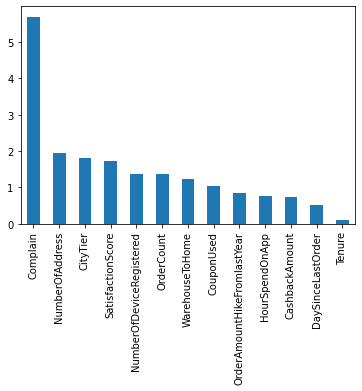

In [ ]:
weights = pd.Series(np.exp(logreg_over.coef_[0]), #pembobotan variable
                 index=X.columns.values)
print (weights.sort_values(ascending = False).plot(kind='bar'))

Dapat terlihat bahwa variabel Complain sangat berpengaruh pada probabilitas Churn.

## **9. Confusion matrix**

Ada 4 jenis hasil pemodelan yaitu :
1. True Positives (TP) : Ketika hasil prediksi menyebutkan suatu data termasuk dalam suatu kelas, dan kondisi aktualnya memang termasuk dalam kelas tersebut.

2. True Negatives (TN) : Ketika hasil prediksi menyebutkan suatu data tidak termasuk dalam suatu kelas, dan kondisi aktualnya memang tidak termasuk dalam kelas tersebut.

3. False Positives (FP) : Ketika hasil prediksi menyebutkan suatu data termasuk dalam suatu kelas, namun kondisi aktualnya tidak termasuk dalam kelas tersebut. Disebut error Tipe I

4. False Negatives (FP) : Ketika hasil prediksi menyebutkan suatu data tidak termasuk dalam suatu kelas, namun kondisi aktualnya termasuk dalam kelas tersebut. Disebut error Tipe II

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test_over)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[730 209]
 [ 45 142]]

True Positives(TP) =  730

True Negatives(TN) =  142

False Positives(FP) =  209

False Negatives(FN) =  45


Nilai-nilai pada confusion matrix untuk model adalah sebagai berikut :
- True Positives(TP) =  724

- True Negatives(TN) =  145

- False Positives(FP) =  212

- False Negatives(FN) =  42

Terlihat masih banyak nilai False Positive pada hasil prediksi model.

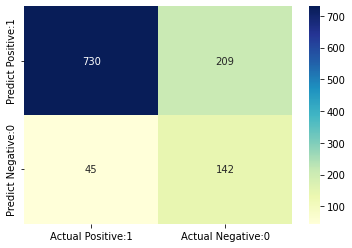

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Dapat dilihat heatmap dari Confusion Matrix.

## **10. Classification metrices**

a. Classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test_over))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       939
           1       0.40      0.76      0.53       187

    accuracy                           0.77      1126
   macro avg       0.67      0.77      0.69      1126
weighted avg       0.85      0.77      0.80      1126



Dapat dilihat metriks klasifikasi dari model. Nilai-nilai Recall, F1-Score dan Support akan dijelaskan setelah ini.

In [ ]:
# Performance training
multiclass_eval(y_over, y_pred_train_over, name='Logreg Oversampling - Training')

Logreg Oversampling - Training Model Performance
[[2940  803]
 [ 624 3119]] 

Accuracy          : 80.9 %

Class 0 Overview:
Recall Class 0    : 78.5 %
Precision Class 0 : 82.5 %
F1 Score  Class 0 : 80.5 %

Class 1 Overview:
Recall Class 1    : 83.3 %
Precision Class 1 : 79.5 %
F1 Score  Class 1 : 81.4 %


Disini dijelaskan Performa Model menggunakan data Training. Terlihat bahwa akurasi model dengan data Training lebih besar daripada menggunakan data Testing.

In [ ]:
# Performance testing
multiclass_eval(y_test, y_pred_test_over, name='Logreg Oversampling - Testing')

Logreg Oversampling - Testing Model Performance
[[730 209]
 [ 45 142]] 

Accuracy          : 77.4 %

Class 0 Overview:
Recall Class 0    : 77.7 %
Precision Class 0 : 94.2 %
F1 Score  Class 0 : 85.2 %

Class 1 Overview:
Recall Class 1    : 75.9 %
Precision Class 1 : 40.5 %
F1 Score  Class 1 : 52.8 %


Disini dijelaskan Performa Model menggunakan data Testing. Terlihat bahwa akurasi model dengan data Training lebih besar daripada menggunakan data Testing.

b. Classification accuracy

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

Disini dijelaskan variabel-variabel pada Confusion Matrix.

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.7744


Akurasi model bernilai 0.7744.

c. Classification error

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.2256


Error model bernilai 0.2256.

d. Precision

Precision adalah persentase nilai prediksi output positif yang benar dibandingkan semua prediksi output positif. Rumusnya adalah TP / (TP+FP)

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.7774


Presisi model bernilai 0.7742.

e. Recall

Recall adalah persentase nilai prediksi output positif yang benar dibandingkan semua output positif aktual. Rumusnya adalah TP/(TP+FN)

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9419


Nilai Recall model bernilai 0.9454

f. True Positive Rate

Sama dengan Recall

In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9419


Nilai True Positive rate model bernilai 0.9454.

g. False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.5954


Nilai False Positive Rate model bernilai 0.5938.

h. Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.4046


Nilai Specificity bernilai 0.4062.

## **11. Histogram hasil pemodelan**

By default, nilai ambang batas klasifikasi adalah :
1. Ambang batas bernilai 0.5
2. Churn bernilai 1 - jika kemungkinan akan churn memiliki probabilitas >0.5
3. Churn bernilai 0 - jika kemungkinan akan churn memiliki probabilitas <0.5

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg_over.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.1738784 , 0.8261216 ],
       [0.68710578, 0.31289422],
       [0.96039488, 0.03960512],
       [0.36236246, 0.63763754],
       [0.83510578, 0.16489422],
       [0.36637513, 0.63362487],
       [0.53276236, 0.46723764],
       [0.52250649, 0.47749351],
       [0.84898215, 0.15101785],
       [0.29474688, 0.70525312]])

Memprediksi probabilitas Churn dari 10 nilai pertama.

In [ ]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Probability of Churn (1)', 'Probability of not Churn (0)'])

y_pred_prob_df

,Probability of Churn (1),Probability of not Churn (0)
0,0.173878,0.826122
1,0.687106,0.312894
2,0.960395,0.039605
3,0.362362,0.637638
4,0.835106,0.164894
5,0.366375,0.633625
6,0.532762,0.467238
7,0.522506,0.477494
8,0.848982,0.151018
9,0.294747,0.705253


Melihat probabilitas Churn dari 10 nilai X pertama.

In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of churn

logreg_over.predict_proba(X_test)[0:10, 1]

array([0.8261216 , 0.31289422, 0.03960512, 0.63763754, 0.16489422,
       0.63362487, 0.46723764, 0.47749351, 0.15101785, 0.70525312])

Melihat probabilitas Churn bernilai 1 (yes Churn) dari 10 nilai X pertama.

In [ ]:
# store the predicted probabilities for class 1 - Probability of churn

y_pred1 = logreg_over.predict_proba(X_test)[:, 1]

Menyimpan probabilitas Churn bernilai 1 (yes Churn) dari 10 nilai X pertama.

Text(0, 0.5, 'Frequency')

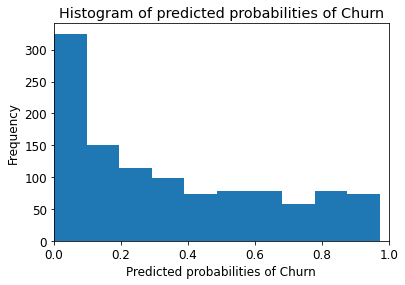

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Churn')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Churn')
plt.ylabel('Frequency')

Observasi :
- Histogram prediksi probabilitas Churn memiliki skew positif
- Mayoritas observasi memprediksi bahwa Churn tidak terjadi

## **12. Nilai ROC dan AUC**

Kurva ROC (Receiver Operating Characteristic) adalah plot yang menampilkan performa klasifikasi model pad berbagai klasifikasi nilai ambang batas.

Kurva ROC memplot True Positive Rate (Recall) terhadap False Positive Rate.

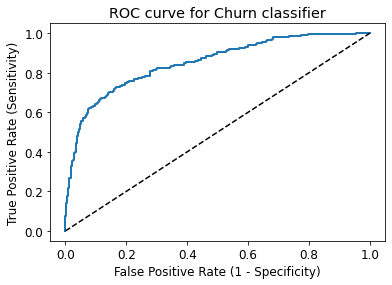

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Churn classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


Dapat dilihat kurva ROC yang memplot TP Rate terhadap FP rate.

**ROC - AUC**

ROC - AUC adalah luasan di bawah kurva ROC. Jika nilai AUC mendekati 1, maka classifier atau model dinilai baik.

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8508


Nilai AUC mendekati 1, maka dapat dikatakan model dapat memprediksi Churn dengan baik.

In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg_over, X_over, y_over, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8813


Nilai Cross Validated ROC AUC bernilai lebih besar, yaitu 0.8786.

## **Evaluasi dan Peningkatan Model**

## **1. Recursive Feature Elimination with Cross Validation**

Recursive Feature Elimination with Cross Validation akan mengiterasi fitur-fitur mana saja yang paling penting untuk memprediksi data, lalu mebuat model dengan fitur yang telah terseleksi/tereliminasi.

In [ ]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg_over, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_over, y_over)

Dilakukan import module RFECV serta fitting RFECV untuk data training.

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 11


Fitur optimal yang seharusnya digunakan berjumlah 11.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4504 entries, 0 to 4503
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       4504 non-null   float64
 1   CityTier                     4504 non-null   float64
 2   WarehouseToHome              4504 non-null   float64
 3   HourSpendOnApp               4504 non-null   float64
 4   NumberOfDeviceRegistered     4504 non-null   float64
 5   SatisfactionScore            4504 non-null   float64
 6   NumberOfAddress              4504 non-null   float64
 7   Complain                     4504 non-null   float64
 8   OrderAmountHikeFromlastYear  4504 non-null   float64
 9   CouponUsed                   4504 non-null   float64
 10  OrderCount                   4504 non-null   float64
 11  DaySinceLastOrder            4504 non-null   float64
 12  CashbackAmount               4504 non-null   float64
dtypes: float64(13)
mem

In [ ]:
colbaru=rfecv.get_support(indices=True)
X_train_new = X_train.iloc[:,colbaru]
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4504 entries, 0 to 4503
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    4504 non-null   float64
 1   CityTier                  4504 non-null   float64
 2   WarehouseToHome           4504 non-null   float64
 3   HourSpendOnApp            4504 non-null   float64
 4   NumberOfDeviceRegistered  4504 non-null   float64
 5   SatisfactionScore         4504 non-null   float64
 6   NumberOfAddress           4504 non-null   float64
 7   Complain                  4504 non-null   float64
 8   OrderCount                4504 non-null   float64
 9   DaySinceLastOrder         4504 non-null   float64
 10  CashbackAmount            4504 non-null   float64
dtypes: float64(11)
memory usage: 387.2 KB


Dapat dilihat fitur-fitur apa saja yang digunakan setelah digunakan RFECV.

Terlihat bahwa jumlah fitur berkurang dari 13 menjadi 11.

In [ ]:
# transform the training data

X_train_rfecv = rfecv.transform(X_over)

# train classifier

logreg_over.fit(X_train_rfecv, y_over)

LogisticRegression(random_state=0, solver='liblinear')

Training data dengan Logistic Regression setelah dilakukan RFECV.

In [ ]:
# test classifier on test data

X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = logreg_over.predict(X_test_rfecv)

Testing data dengan Logistic Regression setelah dilakukan RFECV.

In [ ]:
# print mean accuracy on transformed test data and labels

print ("Classifier score: {:.4f}".format(logreg_over.score(X_test_rfecv,y_test)))

Classifier score: 0.7780


Didapatkan nilai akurasi model meningkat dari 0.7744 menjadi 0.778, menggunakan RFECV.

In [ ]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_rfecv)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

Confusion matrix

 [[732 207]
 [ 43 144]]

True Positives(TP1) =  732

True Negatives(TN1) =  144

False Positives(FP1) =  207

False Negatives(FN1) =  43


Nilai False positives berkurang dari 212 menjadi 207. Nilai False negatives bertambah dari 42 menjadi 43.

## **2. k-Fold Cross Validation**

In [ ]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg_over, X_over, y_over, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79305741 0.80627923 0.81229125 0.8002672  0.82097528]


Dilakukan Logistic Regression dengan modifikasi k-Fold Cross Validation untuk meningkatkan performa model.

In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8066


k-Fold Cross validation meningkatkan skor model dari 0.7744 menjadi 0.8042.

## **3. Hyperparameter Optimization menggunakan GridSearchCV**

Digunakan GridSearchCV untuk mencari parameter apakah pada LogisticRegression yang menghasilkan skor model terbaik.

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg_over,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_over, y_over)


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

Syntax GridSearchCV digunakan untuk memilih parameter-parameter mana sajakah yang terbaik untuk digunakan pada Logistic Regression.

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8068


Parameters that give the best results : 

 {'C': 10}


Estimator that was chosen by the search : 

 LogisticRegression(C=10, random_state=0, solver='liblinear')


Didapatkan bahwa parameter LogisticRegression terbaik yang menghasilkan akurasi paling besar adalah LogisticRegression(penalty='l1', random_state=0 solver='liblinear')

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.7753


Didapatkan bahwa GridSearch CV tidak merubah skor menjadi 0.7753.

## **4. XG Boost**

In [ ]:
!pip install xgboost

Menginstall library xgboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from datetime import datetime

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)


Mendefinisikan parameter-parameter untuk modeling menggunakan XGBoost.

In [ ]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )


Mendefinisikan fungsi timer untuk menghitung seberapa lama model XGBoost berjalan.

In [ ]:

# Bismillah
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_over, y_over)
timer(start_time) # timing ends here for "start_time" variable

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


Fitting 3 folds for each of 5 candidates, totalling 15 fits

 Time taken: 0 hours 0 minutes and 29.66 seconds.

 All results:
{'mean_fit_time': array([4.17393541, 5.83308665, 4.87806257, 3.70842433, 3.76270016]), 'std_fit_time': array([0.17973091, 0.43103352, 0.04166449, 0.02529798, 0.24540151]), 'mean_score_time': array([0.06052311, 0.18369873, 0.16826439, 0.1201721 , 0.08209356]), 'std_score_time': array([0.0086665 , 0.01019899, 0.00123173, 0.01732943, 0.0326942 ]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=

Didapatkan konfigurasi terbaik untuk XGBoost memiliki parameter berikut:
- Best estimator:
XGBClassifier(colsample_bytree=0.8, gamma=1.5, learning_rate=0.02, max_depth=5,n_estimators=600, nthread=1, silent=True, subsample=0.6)
- Best normalized gini score for 3-fold search with 5 parameter combinations: 0.8962037151869486
- Best hyperparameters:
{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}

In [ ]:

# 2. Create an instance of the estimator
xg_boost = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

# 3. Use the trainning data to train the estimator

xg_boost.fit(X_over, y_over)

# 4. Evaluate the model
y_pred_test_xg = xg_boost.predict(X_test)


#Confusion matrix
matrix = confusion_matrix(y_test,y_pred_test_xg, labels=[1,0])
print('Confusion matrix : \n',matrix)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred_test_xg,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[126  61]
 [ 47 892]]
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.67      0.70       187
           0       0.94      0.95      0.94       939

    accuracy                           0.90      1126
   macro avg       0.83      0.81      0.82      1126
weighted avg       0.90      0.90      0.90      1126



In [ ]:
print('Model accuracy using XG Boost score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_xg)))

Model accuracy using XG Boost score: 0.9041


Akurasi model meningkat menjadi 0.905 dari 0.7744 menggunakan XGBoost.

### a. Membandingkan Skor Training dan Testing pada XGBoost

In [ ]:
print('Training set XGBoost score: {:.4f}'.format(xg_boost.score(X_over, y_over)))
print('Test set score: {:.4f}'.format(xg_boost.score(X_test, y_test)))

Training set XGBoost score: 0.9752
Test set score: 0.9041


Terlihat bahwa Nilai Akurasi Data Training dan Data Testing tidak berbeda jauh (kurang dari 10%). Maka didapat bahwa model XGBoost tidak mengalami overfitting.

### b. Feature Importance pada XGBoost

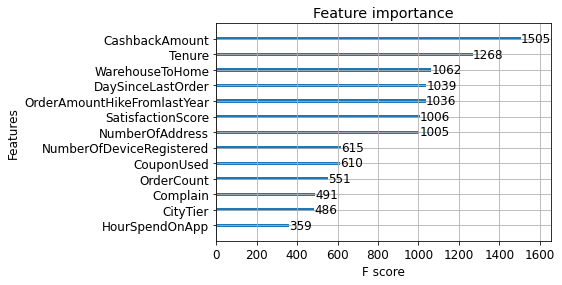

In [ ]:
import xgboost as xgb
xgb.plot_importance(xg_boost)

In [ ]:
xg_boost.feature_importances_

array([0.21598908, 0.06658322, 0.03263776, 0.04346072, 0.06095318,
       0.07552434, 0.0648431 , 0.2006331 , 0.03663204, 0.04499026,
       0.04148456, 0.06474585, 0.05152283], dtype=float32)

Terlihat bahwa dengan Model XGBoost, varibel Cashback Amount merupakan fitur yang paling penting (Paling sering muncul di trees model XGBoost).

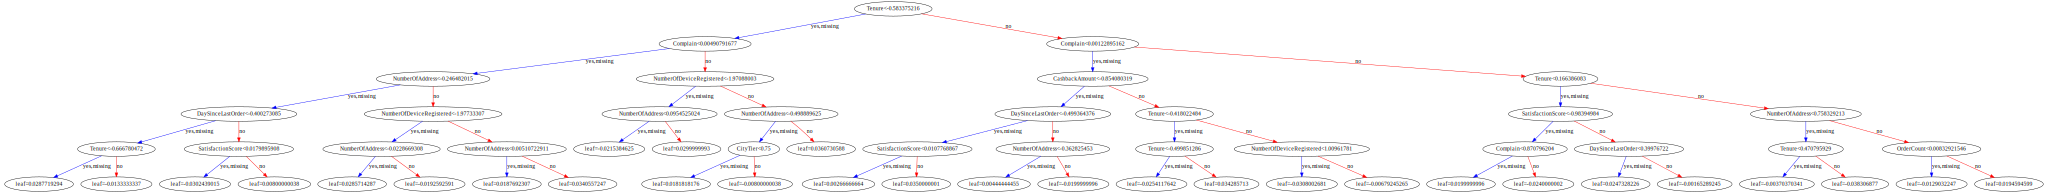

In [ ]:
xgb.to_graphviz(xg_boost)

Grafik diatas adalah ilustrasi Model GBtree dari XGBoost.

## c. Metriks Klasifikasi dari XGBoost

In [ ]:
from sklearn.metrics import confusion_matrix

cm_xg = confusion_matrix(y_test, y_pred_test_xg)

print('Confusion matrix\n\n', cm_xg)

print('\nTrue Positives(TP) = ', cm_xg[0,0])

print('\nTrue Negatives(TN) = ', cm_xg[1,1])

print('\nFalse Positives(FP) = ', cm_xg[0,1])

print('\nFalse Negatives(FN) = ', cm_xg[1,0])

Confusion matrix

 [[892  47]
 [ 61 126]]

True Positives(TP) =  892

True Negatives(TN) =  126

False Positives(FP) =  47

False Negatives(FN) =  61


Nilai di atas adalah nilai-nilai TP, TN FP, dan FN dari model XGBoost.

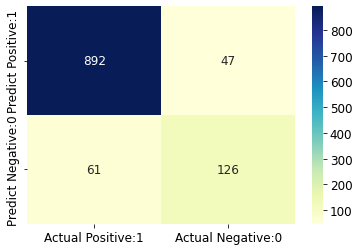

In [ ]:
cm_matrix_xg = pd.DataFrame(data=cm_xg, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_xg, annot=True, fmt='d', cmap='YlGnBu')

Nilai False Positive pada Model XGBoost berkurang dibandingkan pada Model Logreg biasa, yaitu dari FP=212 menjadi FP=47. Sedangkan nilai False Negative bertambah dari FN=42 menjadi FN=60.

In [ ]:
multiclass_eval(y_test, y_pred_test_xg, name='XGBoost - Training')

XGBoost - Training Model Performance
[[892  47]
 [ 61 126]] 

Accuracy          : 90.4 %

Class 0 Overview:
Recall Class 0    : 95.0 %
Precision Class 0 : 93.6 %
F1 Score  Class 0 : 94.3 %

Class 1 Overview:
Recall Class 1    : 67.4 %
Precision Class 1 : 72.8 %
F1 Score  Class 1 : 70.0 %


Skor di atas adalah Adalah nilai Akurasi, Recall, Presisi, serta F1 dari model XGBoost.

## d. Histogram hasil pemodelan dari XGBoost

In [ ]:
y_pred_prob_xg = xg_boost.predict_proba(X_test)[0:10]

y_pred_prob_xg

array([[0.43324292, 0.5667571 ],
       [0.9535    , 0.04650002],
       [0.9145871 , 0.0854129 ],
       [0.7278607 , 0.2721393 ],
       [0.9548683 , 0.04513168],
       [0.824075  , 0.17592505],
       [0.89869505, 0.10130496],
       [0.8967128 , 0.10328721],
       [0.96618533, 0.03381467],
       [0.54598916, 0.45401087]], dtype=float32)

Akan dihitung probabilitas value Churn bernilai 0 dari 10 baris pertama.

In [ ]:
y_pred_prob_xg_df = pd.DataFrame(data=y_pred_prob, columns=['Probability of Churn (1)', 'Probability of not Churn (0)'])

y_pred_prob_xg_df

,Probability of Churn (1),Probability of not Churn (0)
0,0.173878,0.826122
1,0.687106,0.312894
2,0.960395,0.039605
3,0.362362,0.637638
4,0.835106,0.164894
5,0.366375,0.633625
6,0.532762,0.467238
7,0.522506,0.477494
8,0.848982,0.151018
9,0.294747,0.705253


Tabel di atas adalah tabel probabilitas value Churn dari 10 baris pertama.

In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of churn

xg_boost.predict_proba(X_test)[0:10, 1]

array([0.5667571 , 0.04650002, 0.0854129 , 0.2721393 , 0.04513168,
       0.17592505, 0.10130496, 0.10328721, 0.03381467, 0.45401087],
      dtype=float32)

Menampilkan probabilitas Churn bernilai 1

In [ ]:
# store the predicted probabilities for class 1 - Probability of churn

y_pred1_xg = xg_boost.predict_proba(X_test)[:, 1]

Menyimpan probabilitas Churn bernilai 1

Text(0, 0.5, 'Frequency')

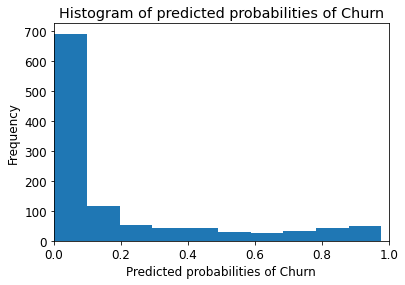

In [ ]:
#plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1_xg, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Churn')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Churn')
plt.ylabel('Frequency')

Sama seperti hasil histogram pada Logreg biasa, histogram memiliki skew positif serta lebih banyak memprediksi value Churn bernilai 0.

## e. Kurva ROC dan nilai AUC dari model XGBoost

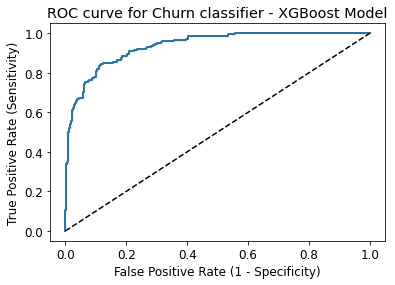

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1_xg)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Churn classifier - XGBoost Model')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

Kurva ROC dari Model XGBoost lebih asimptotik daripada kurva ROC Model Logreg biasa.

In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC_xg = roc_auc_score(y_test, y_pred1_xg)

print('ROC AUC : {:.4f}'.format(ROC_AUC_xg))

ROC AUC : 0.9365


Nilai ROC AUC dari model XGBoost meingkat dari 0.84 menjadi 0.94.

In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC_xg = cross_val_score(xg_boost, X_over, y_over, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC XGBoost: {:.4f}'.format(Cross_validated_ROC_AUC_xg))

Cross validated ROC AUC XGBoost: 0.9885


Nilai ROC AUC Cross-Validated dari model XGBoost meingkat dari 0.84 menjadi 0.988.

## **5. Hasil dan Kesimpulan**

- Variabel Complain merupakan variabel yang paling memiliki korelasi positif dengan Churn, sedangkan variabel Tenure merupakan variabel yang memiliki korelasi negatif dengan Churn.
- Digunakan RobustScaler untuk scaling data, dikarenakan data memiliki Outlier.
- Terdapat imbalance pada dataset, maka dari itu dilakukan undersampling dan oversampling, kemudian membandingkan akurasi modelnya.
- Akurasi model menggunakan data Oversampling adalah sebesar 0.7726, sedangkan menggunakan data Underesampling adalah sebesar 0.7638.
- Dipilih model dengan menggunakan data Oversampling, karena memiliki akurasi lebih besar.
- Perbedaan akurasi model antara data training dan data testing tidak terlalu signifikan, yaitu 0.8102 dan 0.7726. Disimpulkan bahwa model tidak mengalami overfitting.
- Akurasi model meningkat seiring meningkatnya parameter C pada LogisticRegression
- Akurasi model masih kurang dari NullAccuracy, yaitu 0.7726 dibandingkan 0.8339
- Bobot variabel terbesar pada LogisticRegression ada pada Variabel Complain.
- Mayoritas observasi memprediksi bahwa Churn tidak terjadi. Histogram prediksi probabilitas Churn memiliki skew Positif
- Nilai AUC adalah sebesar 0.8508, disimpulkan bahwa model dapat memprediksi Churn dengan baik.
- Peningkatan model dengan Recursive Feature Elimination with Cross Validation meningkatkan akurasi model dari 0.7726 menjadi 0.8801.
- Peningkatan model dengan k-Fold Cross Validation meningkatkan akurasi model dari 0.7726 menjadi 0.8743.
- Peningkatan model dengan Hyperparameter Optimization menggunakan GridSearchCV meningkatkan akurasi model dari 0.7726 menjadi 0.8757.
- Peningkatan model dengan XGBoost meningkatkan akurasi model dari 0.7726 menjadi 0.905.
- XGBoost adalah metode terbaik untuk meningkatkan akurasi model ini.